## seaborn:分类分布图，箱线图

内容介绍：

* (1)boxplot():catplot(kind='box'),箱线图
* (2)violinplot():catplot(kind='ciolin'),小提琴图

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 加载数据：

In [6]:
# 网络加载官方案例数据
# tips = sns.load_dataset('tips')

#使用本地数据加载
df0 = pd.read_csv('otherdata/athlete_events.csv')
countries = {
    'CHN':'中国',
    'JPN':'日本',
    'KOR':'韩国',
    'USA':'美国',
    'CAN':'加拿大',
    'BRA':'巴西',
    'GBR':'英国',
    'FRA':'法国',
    'ITA':'意大利',
    'ETH':'埃塞俄比亚',
    'KEN':'肯尼亚',
    'NIG':'尼日利亚',
}
df0.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
#提取字典关键字中的国家数据。其余国家数据不提取。
df = df0[df0['NOC'].isin(list(countries.keys()))]
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN


### 1.箱线图

<AxesSubplot:xlabel='NOC', ylabel='Height'>

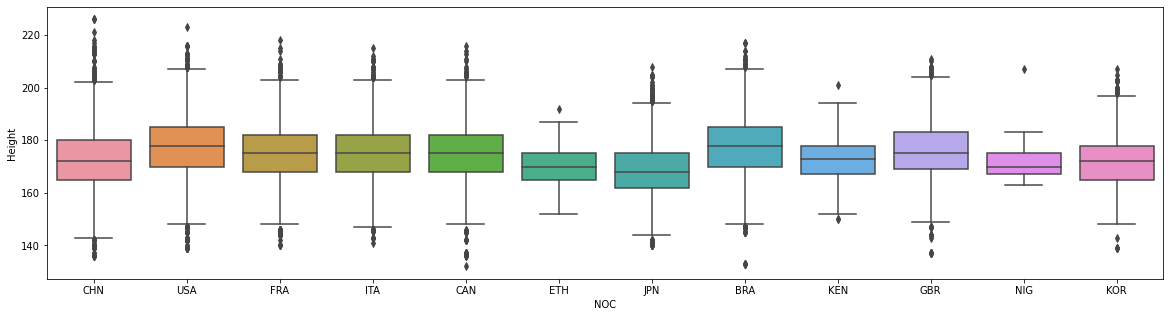

In [13]:
#设置图形的大小，需要通过matplotlib的底层数据设置
plt.figure(figsize=(20,5))
#绘制简单的箱线图，显示选取数据的不同国家身高水平
sns.boxplot(x='NOC',y='Height',data=df)

<AxesSubplot:xlabel='NOC', ylabel='Height'>

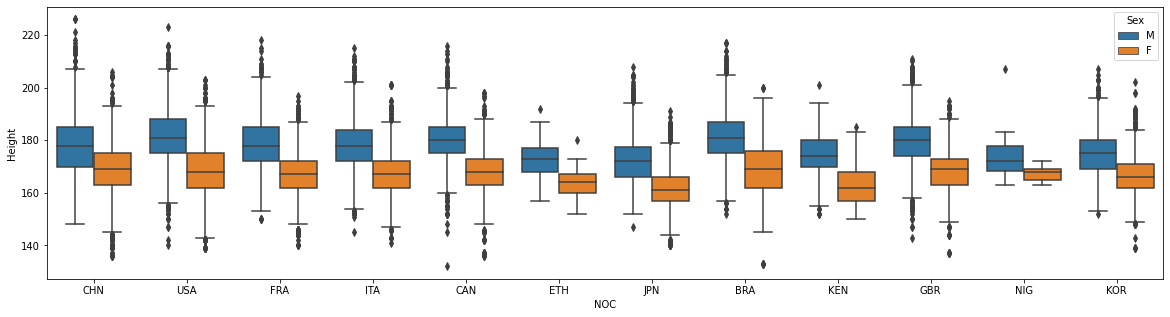

In [16]:
plt.figure(figsize=(20,5))
#根据性别数据显示
sns.boxplot(x='NOC',y='Height',data=df,hue='Sex')

([<matplotlib.axis.XTick at 0xffff4e18ddf0>,
 [Text(0, 0, '中国'),
  Text(1, 0, '日本'),
  Text(2, 0, '韩国'),
  Text(3, 0, '美国'),
  Text(4, 0, '加拿大'),
  Text(5, 0, '巴西'),
  Text(6, 0, '英国'),
  Text(7, 0, '法国'),
  Text(8, 0, '意大利'),
  Text(9, 0, '埃塞俄比亚'),
  Text(10, 0, '肯尼亚'),
  Text(11, 0, '尼日利亚')])

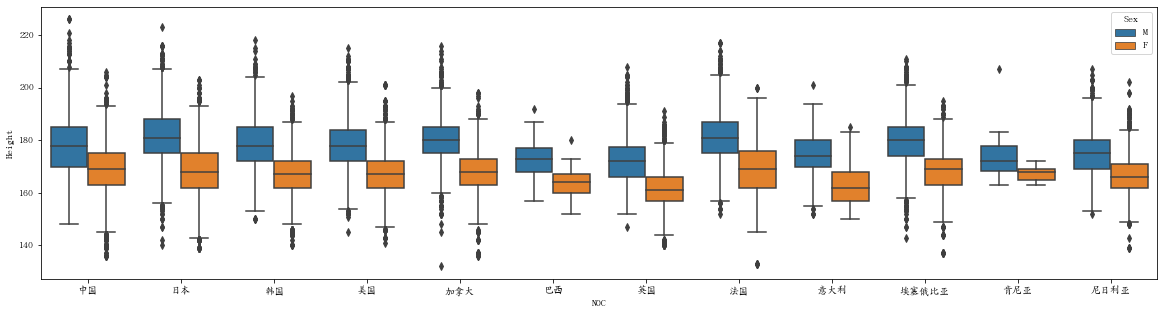

In [21]:
plt.rcParams['font.sans-serif'] = ['AR PL UKai CN']
plt.figure(figsize=(20,5))
#根据性别数据显示
sns.boxplot(x='NOC',y='Height',data=df,hue='Sex')
plt.xticks(range(len(countries.values())),countries.values())

### 2.小提琴图

In [24]:
#使用本地数据加载
df2 = pd.read_csv('seaborn-data/tips.csv')
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

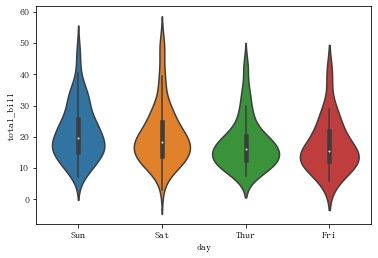

In [25]:
#KDE曲线表示(和密度估计曲线)，实际上是把直方图的发生数量使用高斯曲线画出
#中间包含箱线图，默认为box
sns.violinplot(x='day',y='total_bill',data=df2)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

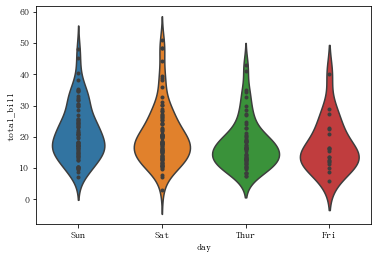

In [27]:
#可以修改inner参数，中的箱线图改为散点、线条，四分为数等方式显示
sns.violinplot(x='day',y='total_bill',data=df2,inner='point')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

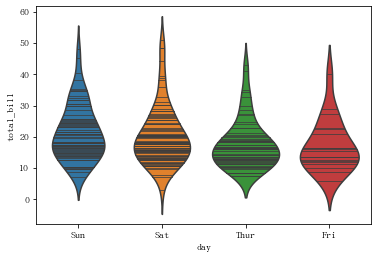

In [28]:
sns.violinplot(x='day',y='total_bill',data=df2,inner='stick')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

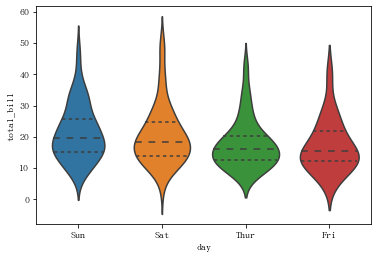

In [29]:
sns.violinplot(x='day',y='total_bill',data=df2,inner='quartile')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

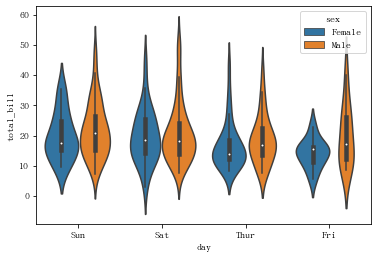

In [30]:
#加入列数据后，分图显示
sns.violinplot(x='day',y='total_bill',data=df2,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

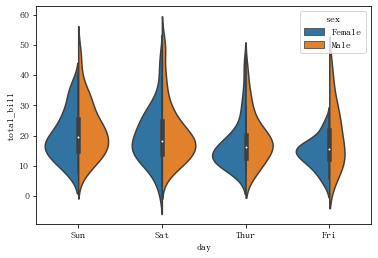

In [31]:
#两项数据的小提琴图合并显示对比。
sns.violinplot(x='day',y='total_bill',data=df2,hue='sex',split=True)